In [1]:
#importing python libs

import sympy as sym
sym.init_printing()

import numpy as np
from math import pi
import math
import matplotlib.pyplot as plt
from sympy import I, Matrix, symbols
from sympy.physics.quantum import TensorProduct, Dagger
import scipy.optimize
import scipy.integrate
import scipy.constants as const

#import qutip

from matplotlib.colors import Normalize as Norm

In [86]:
A,B,C,D,F,G =sym.symbols('A B C D F G')

a,ac,b,bc=sym.symbols('a \\bar{a} b \\bar{b}', Complex=True)
Sb13,Sa13=sym.symbols('S_b_1_3 S_a_1_3', Complex=True)
#Sbc13,Sac13=sym.symbols('S_\\bar{b}_1_3 S_\\bar{a}_1_3', Complex=True)
Sbc13,Sac13=sym.symbols('S_bc_1_3 S_ac_1_3', Complex=True)
Sb12,Sa12=sym.symbols('S_b_1_2 S_a_1_2', Complex=True)
Sbc12,Sac12=sym.symbols('S_bc_1_2 S_ac_1_2', Complex=True)

w, wcm,wco=sym.symbols('omega omega_c_mu omega_c_o',Real=True) 
gammi,gammc,gamoi,gamoc=sym.symbols('gamma_mu_i gamma_mu_c gamma_o_i gamma_o_c',positive = True, Real=True)

aa,aac,ab,abc=sym.symbols('a_a a_a_c a_b a_b_c')
aca,acac,acb,acbc=sym.symbols('\\bar{a}_a \\bar{a}_{ac} \\bar{a}_b \\bar{a}_{bc}')
ba,bac,bb,bbc=sym.symbols('b_a b_a_c b_b b_b_c')
bca,bcac,bcb,bcbc=sym.symbols('\\bar{b}_a \\bar{b}_{bc} \\bar{b}_b \\bar{b}_{bc}')
Caa, Caac, Cab, Cabc=sym.symbols('C_{aa} C_{aac} C_{ab} C_{abc}')
Caca, Cacac, Cacb, Cacbc=sym.symbols('C_{aca} C_{acac} C_{acb} C_{acbc}')
Cba, Cbac, Cbb, Cbbc=sym.symbols('C_{ba} C_{bac} C_{bb} C_{bbc}')
Cbca, Cbcac, Cbcb, Cbcbc=sym.symbols('C_{bca} C_{bcac} C_{bcb} C_{bcbc}')

a_in,ac_in,b_in,bc_in=sym.symbols('a_{in} \\bar{a}_{in} b_{in} \\bar{b}_{in}', Complex=True)
Cain, Cacin, Cbin, Cbcin=sym.symbols('C_{ain} C_{acin} C_{bin} C_{bcin}')

In [33]:
[A B] [a] = [F] 
[C D] [ac]= [G]

SyntaxError: invalid syntax (<ipython-input-33-39893d1f818a>, line 1)

In [65]:
A_eq=-I*w+I*wco+I*Sa13+(gamoi+gamoc)/2
B_eq=I*Sac13
D_eq=-I*w-I*wco-I*sym.conjugate(Sa13)+(gamoi+gamoc)/2
C_eq=-I*sym.conjugate(Sac13)
F_eq=-I*(b*Sb13+bc*Sbc13)+sym.sqrt(gamoc)*aa
G_eq= I*(bc*sym.conjugate(Sb13)+b*sym.conjugate(Sbc13))+sym.sqrt(gamoc)*aac
mat1=Matrix([[A,B],[C,D]])
mat2=Matrix([[F],[G]])



In [66]:
sym.simplify((mat1.inv()*mat2).subs({A:A_eq,B:B_eq,C:C_eq,D:D_eq,F:F_eq,G:G_eq}))

⎡  ⎛             ⎛        _______     ⎛        _______     ________⎞⎞   ⎛     
⎢2⋅⎝2⋅ⅈ⋅S_ac_1_3⋅⎝a_a_c⋅╲╱ γ_o_c  + ⅈ⋅⎝\bar{b}⋅S_b_1_3 + b⋅S_bc_1_3⎠⎠ + ⎝aₐ⋅╲╱
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                     ________   ⎛                            
⎢                          4⋅S_ac_1_3⋅S_ac_1_3 + ⎝-γ_o_c - γₒ ᵢ + 2⋅ⅈ⋅ω + 2⋅ⅈ⋅
⎢                                                                             
⎢ ⎛    ⎛     _______                                   ⎞ ________     ⎛       
⎢-⎝4⋅ⅈ⋅⎝aₐ⋅╲╱ γ_o_c  - ⅈ⋅(S_b_1_3⋅b + S_bc_1_3⋅\bar{b})⎠⋅S_ac_1_3 + 2⋅⎝a_a_c⋅╲
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                      ________   ⎛                           
⎣                           4⋅S_ac_1_3⋅S_ac_1_3 + ⎝-γ_o_c - γₒ ᵢ + 2⋅ⅈ⋅ω + 2⋅ⅈ

_______                                   ⎞ ⎛                                 
 γ_o_c  - ⅈ⋅(S_b_1_3⋅b + S_bc_1_3⋅\bar{b})⎠⋅⎝-γ_o_c

In [90]:
mat2=Matrix([[Caa, Caac, Cab, Cabc],[Caca, Cacac, Cacb, Cacbc],[Cba, Cbac, Cbb, Cbbc],[Cbca, Cbcac, Cbcb, Cbcbc]])
mat3=Matrix([a_in*Cain, ac_in*Cacin, b_in*Cbin, bc_in*Cbcin])
a_test1=sym.simplify((mat2.inv()* mat3)[0])

In [79]:
sym.simplify(mat2.inv())

⎡                                                                             
⎢─────────────────────────────────────────────────────────────────────────────
⎢C_{aac}⋅C_{aca}⋅C_{bbc}⋅C_{bcb} - C_{aac}⋅C_{aca}⋅C_{bb}⋅C_{bcbc} - C_{aac}⋅C
⎢                                                                             
⎢                                                                             
⎢─────────────────────────────────────────────────────────────────────────────
⎢C_{aac}⋅C_{aca}⋅C_{bbc}⋅C_{bcb} - C_{aac}⋅C_{aca}⋅C_{bb}⋅C_{bcbc} - C_{aac}⋅C
⎢                                                                             
⎢                                                                             
⎢─────────────────────────────────────────────────────────────────────────────
⎢C_{aac}⋅C_{aca}⋅C_{bbc}⋅C_{bcb} - C_{aac}⋅C_{aca}⋅C_{bb}⋅C_{bcbc} - C_{aac}⋅C
⎢                                                                             
⎢                                                   

In [89]:
Caa_eq= -I*w+I*wco+I*Sa13+(gamoi+gamoc)/2
Caac_eq=I*Sac13
Cab_eq=I*Sb13
Cabc_eq=I*Sbc13

Caca_eq=-I*sym.conjugate(Sac13)
Cacac_eq=-I*w-I*wco-I*sym.conjugate(Sa13)+(gamoi+gamoc)/2
Cacb_eq=-I*sym.conjugate(Sbc13)
Cacbc_eq=-I*sym.conjugate(Sb13)

Cba_eq = I*Sa12
Cbac_eq = I*Sac12
Cbb_eq=-I*w+I*wcm+I*Sb12+(gammi+gammc)/2
Cbbc_eq= I*Sbc12

Cbca_eq = -I*sym.conjugate(Sac12)
Cbcac_eq = -I*sym.conjugate(Sa12)
Cbcb_eq=-I*sym.conjugate(Sbc12)
Cbcbc_eq= -I*w-I*wcm -I*sym.conjugate(Sb12)+(gammi+gammc)/2

In [83]:
Caa_eq

In [91]:
a_test2=a_test1.subs({Caa:Caa_eq,Caac:Caac_eq,Cab:Cab_eq,Cabc:Cabc_eq,
                     Caca:Caca_eq,Cacac:Cacac_eq,Cacb:Cacb_eq,Cacbc:Cacbc_eq,
                     Cba:Cba_eq,Cbac:Cbac_eq,Cbb:Cbb_eq,Cbbc:Cbbc_eq,
                     Cbca:Cbca_eq,Cbcac:Cbcac_eq,Cbcb:Cbcb_eq,Cbcbc:Cbcbc_eq})


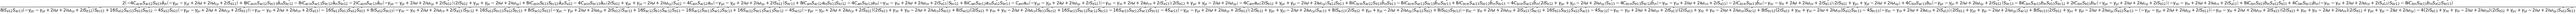

In [94]:
sym.simplify(a_test2)